In [1]:
from tensorflow.keras.applications import VGG16, InceptionV3, InceptionResNetV2
from keras.applications.resnet50 import ResNet50
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.callbacks import History
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
import tensorflow as tf
from tensorflow import keras as keras
print(tf.__version__)

print(keras.__version__)

2.4.1
2.4.0


In [2]:
h,w = 300, 300
model = ResNet50(weights='imagenet',include_top=False,input_shape=(h,w,3))


top_model = Sequential()
top_model.add(Flatten(input_shape=model.output_shape[1:]))
top_model.add(Dropout(0.5))
top_model.add(Dense(552, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(120, activation='softmax'))

model_transfer = Sequential()
model_transfer.add(model)
model_transfer.add(top_model)

model_transfer.layers[0].trainable = False

model_transfer.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 10, 10, 2048)      23587712  
_________________________________________________________________
sequential (Sequential)      (None, 120)               113222560 
Total params: 136,810,272
Trainable params: 113,222,560
Non-trainable params: 23,587,712
_________________________________________________________________


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

optimizer = RMSprop(lr = 0.0001, rho = 0.99)

model_transfer.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

train_data_dir = r'C:\Users\Jakub\Desktop\Projekt Dog Breed\dog-breed-identification\train_new'
validation_data_dir = r'C:\Users\Jakub\Desktop\Projekt Dog Breed\dog-breed-identification\validation_new'
epochs = 20
batch_size = 16

# prepare data augmentation configuration
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   shear_range=0.2, 
                                   zoom_range=0.2,
                                   rotation_range=45, 
                                   horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir, 
                                                    target_size=(h, w), 
                                                    batch_size=batch_size, 
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(validation_data_dir,
                                                        target_size=(h, w), 
                                                        batch_size=batch_size,
                                                        class_mode='categorical')

Found 7822 images belonging to 120 classes.
Found 2400 images belonging to 120 classes.


In [5]:
history_tr_ag = History()
early_stopping = EarlyStopping(patience=4,monitor="val_loss")
save_best_model = ModelCheckpoint(r'C:\Users\Jakub\Desktop\GitHubProjects\dog_breed_classifier\best_model1.h5',save_best_only=True)

model_transfer.fit(train_generator, batch_size=batch_size, epochs=epochs, 
                    validation_data=validation_generator,  callbacks=[early_stopping, history_tr_ag, save_best_model])

Epoch 1/20
489/489 [==============================] - 1880s 4s/step - loss: 8.1292 - accuracy: 0.0086 - val_loss: 4.7875 - val_accuracy: 0.0083
Epoch 2/20
489/489 [==============================] - 1867s 4s/step - loss: 4.7892 - accuracy: 0.0135 - val_loss: 4.7875 - val_accuracy: 0.0083
Epoch 3/20
489/489 [==============================] - 1847s 4s/step - loss: 4.7888 - accuracy: 0.0129 - val_loss: 4.7876 - val_accuracy: 0.0083
Epoch 4/20
489/489 [==============================] - 1851s 4s/step - loss: 4.7846 - accuracy: 0.0133 - val_loss: 4.7877 - val_accuracy: 0.0083
Epoch 5/20
489/489 [==============================] - 1852s 4s/step - loss: 4.7840 - accuracy: 0.0130 - val_loss: 4.7878 - val_accuracy: 0.0083


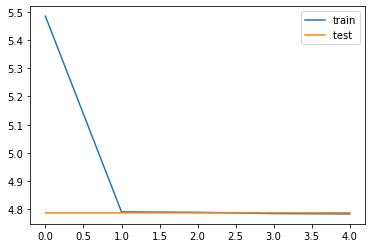

In [6]:
plt.plot(history_tr_ag.history['loss'], label = "train")
plt.plot(history_tr_ag.history['val_loss'], label = "test ")

plt.legend()
plt.show()